In [1]:
import ee
import geemap

In [2]:
Map = geemap.Map()

In [3]:
ee.Initialize()

In [20]:
from utils.utils import get_square_roi, correct_image_shape

ImportError: cannot import name 'correct_image_shape' from 'utils.utils' (d:\python\SoilNet\dataset\utils\utils.py)

In [6]:
roi = get_square_roi(31.8974, 54.3569, roi_size=1920, return_gee_object=True)
Map = geemap.Map(zoom=12)
Map.addLayer(roi)
Map.centerObject(roi)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [13]:
l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
                .filterDate('2015-01-01', '2015-03-03') \
                .filter(ee.Filter.lt('CLOUD_COVER',10)) \
                .filterBounds(roi) \
                #.filter(ee.Filter.contains('.geo', roi)) #this line checks if the scene completly covers the roi, which mean roi is in the scene
l8.size()

In [14]:
l8_img = l8.median().clip(roi).multiply(2.75e-05).add(-0.2)
bands = ['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7']
l8_img = l8_img.select(bands)

In [15]:
geemap.download_ee_image(l8_img, "l8.tif",crs='EPSG:3857', scale=30,region = roi)

l8.tif: |          | 0.00/323k (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None


In [19]:
from skimage import io
import numpy as np
from utils.utils import correct_image_shape
l8_np = io.imread('l8.tif')
print(l8_np.shape)
l8_np = correct_image_shape(l8_np)
print(l8_np.shape)
print(np.min(l8_np),np.max(l8_np))

ImportError: cannot import name 'correct_image_shape' from 'utils.utils' (d:\python\SoilNet\dataset\utils\utils.py)

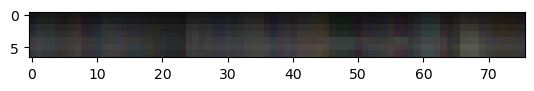

In [17]:
import matplotlib.pyplot as plt
plt.imshow(l8_np[:,:,[3,2,1]])